In [4]:
# function to load the model from my repository

def get_dbn_library():
  files = ["DBN.py", "RBM.py", "GaussianBernoulliRBM.py"]
  repository_url = "https://raw.githubusercontent.com/mehulrastogi/Deep-Belief-Network-pytorch/master/"
  for file in files:
    ! wget -O {file} {repository_url}{file}

get_dbn_library()

import RBM as rbm
import DBN as dbn
import GaussianBernoulliRBM as GBrbm

--2022-04-24 22:59:46--  https://raw.githubusercontent.com/mehulrastogi/Deep-Belief-Network-pytorch/master/DBN.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5199 (5.1K) [text/plain]
Saving to: ‘DBN.py’

DBN.py              100%[===================>]   5.08K  --.-KB/s    in 0s      

2022-04-24 22:59:46 (51.0 MB/s) - ‘DBN.py’ saved [5199/5199]

--2022-04-24 22:59:46--  https://raw.githubusercontent.com/mehulrastogi/Deep-Belief-Network-pytorch/master/RBM.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7658 (7.5K) [text/plain

In [5]:
# Importing the libraries
from DBN import DBN
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np

In [6]:
#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

In [7]:
mnist_data.data = (mnist_data.data.type(torch.FloatTensor)/255).bernoulli()
#https://stackoverflow.com/questions/68056122/attributeerror-cant-set-attribute-in-splitting-mnist-dataset

The number shown is the number: 2


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


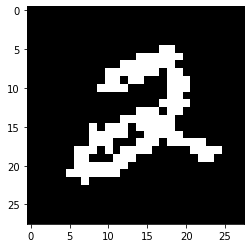

In [8]:
#Lets us visualize a number from the data set
idx = 5
img = mnist_data.train_data[idx]
print("The number shown is the number: {}".format(mnist_data.train_labels[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [9]:
# I have have set these hyper parameters although you can experiment with them to find better hyperparameters.
dbn_mnist = DBN(visible_units=28*28 ,
                hidden_units=[23*23 ,18*18] ,
                k = 5,
                learning_rate = 0.01,
                learning_rate_decay = True,
                xavier_init = True,
                increase_to_cd_k = False,
                use_gpu = False)

In [10]:
num_epochs = 1
batch_size = 10

dbn_mnist.train_static(mnist_data.data,mnist_data.train_labels,num_epochs , batch_size)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


--------------------
Training the 1 st rbm layer
RBM fitting: 6000it [01:02, 95.49it/s]
Epoch:1 ,avg_cost = 0.5685927271842957 ,std_cost = 0.10950087010860443 ,avg_grad = 12034.041015625 ,std_grad = 1996.5126953125
--------------------
Training the 2 st rbm layer
RBM fitting: 6000it [00:37, 157.91it/s]
Epoch:1 ,avg_cost = 1.5868498086929321 ,std_cost = 0.16863004863262177 ,avg_grad = 11954.6103515625 ,std_grad = 527.5891723632812


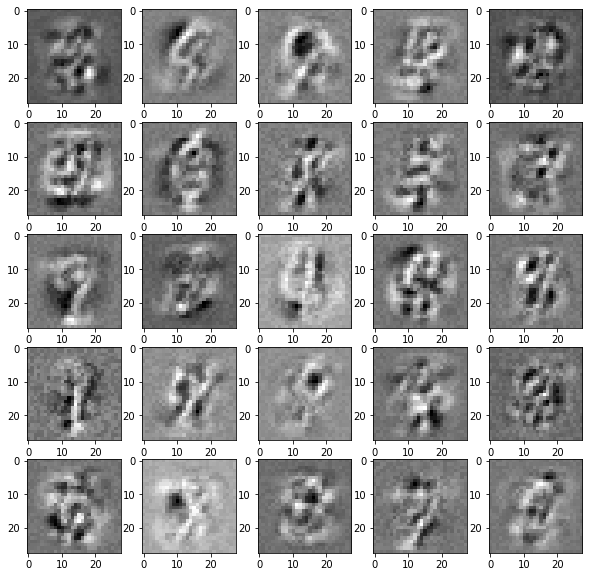

In [11]:
# visualising layer 1
learned_weights = dbn_mnist.rbm_layers[0].W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

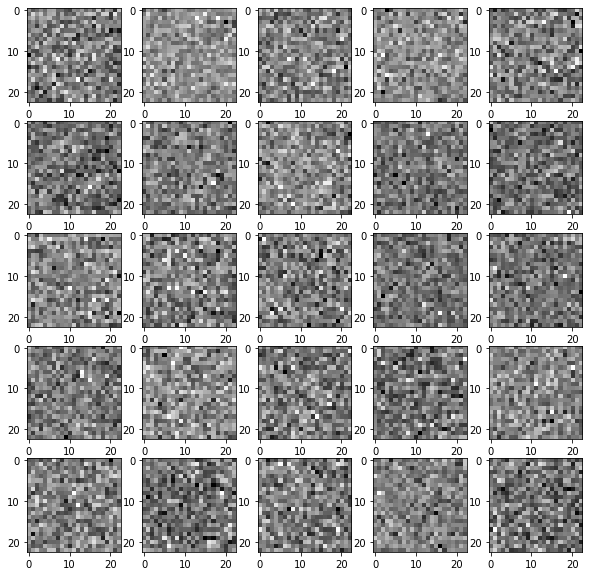

In [12]:
# visualising layer 2
learned_weights = dbn_mnist.rbm_layers[1].W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((23,23)), cmap=plt.cm.gray)
plt.show()

In [13]:
number = 5 #A number between 0 and 10.

particular_mnist = []

limit = mnist_data.train_data.shape[0]
# limit = 60000
for i in range(limit):
    if(mnist_data.train_labels[i] == number):
        particular_mnist.append(mnist_data.train_data[i].numpy())
# particular_mnist = np.array(particular_mnist)
len(particular_mnist)
# mnist_data.train_data

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


5421

In [14]:
train_data = torch.stack([torch.Tensor(i) for i in particular_mnist])
train_label = torch.stack([torch.Tensor(number) for i in range(len(particular_mnist))])

In [15]:
dbn_mnist.train_static(train_data,train_label,20 , batch_size)

--------------------
Training the 1 st rbm layer
RBM fitting: 542it [00:05, 101.03it/s]
Epoch:1 ,avg_cost = 0.5131044387817383 ,std_cost = 0.044625405222177505 ,avg_grad = 10807.4296875 ,std_grad = 552.016357421875
RBM fitting: 542it [00:05, 98.90it/s]
Epoch:2 ,avg_cost = 0.4863828122615814 ,std_cost = 0.043840788304805756 ,avg_grad = 10639.3447265625 ,std_grad = 537.4525756835938
RBM fitting: 542it [00:06, 81.24it/s]
Epoch:3 ,avg_cost = 0.4788435399532318 ,std_cost = 0.042406968772411346 ,avg_grad = 10613.2197265625 ,std_grad = 543.0994262695312
RBM fitting: 542it [00:05, 100.30it/s]
Epoch:4 ,avg_cost = 0.47390589118003845 ,std_cost = 0.0425664484500885 ,avg_grad = 10624.9169921875 ,std_grad = 540.79541015625
RBM fitting: 542it [00:05, 100.30it/s]
Epoch:5 ,avg_cost = 0.47037273645401 ,std_cost = 0.041813239455223083 ,avg_grad = 10643.3095703125 ,std_grad = 537.9927978515625
RBM fitting: 542it [00:05, 98.83it/s]
Epoch:6 ,avg_cost = 0.4682103991508484 ,std_cost = 0.040893539786338806 ,a

The original number: 1


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


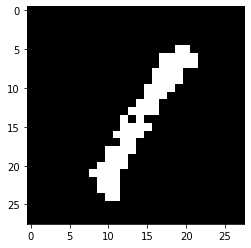

The reconstructed image


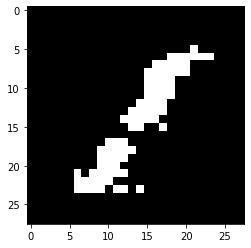

In [21]:
idx = 3
img = mnist_data.train_data[idx]
reconstructed_img = img.view(1,-1).type(torch.FloatTensor)

_,reconstructed_img= dbn_mnist.reconstruct(reconstructed_img)

reconstructed_img = reconstructed_img.view((28,28))
print("The original number: {}".format(mnist_data.train_labels[idx]))
plt.imshow(img , cmap = 'gray')
plt.show()
print("The reconstructed image")
plt.imshow(reconstructed_img , cmap = 'gray')
plt.show()

In [ ]:
idx = 3
img = mnist_data.train_data[idx]
reconstructed_img = img.view(1,-1).type(torch.FloatTensor)

_,reconstructed_img= dbn_mnist.reconstruct(reconstructed_img)

reconstructed_img = reconstructed_img.view((28,28))
print("The original number: {}".format(mnist_data.train_labels[idx]))
plt.imshow(img , cmap = 'gray')
plt.show()
print("The reconstructed image")
plt.imshow(reconstructed_img , cmap = 'gray')
plt.show()